<a href="https://colab.research.google.com/github/Teja220/EDA/blob/main/21BDS0277.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Teja220/EDA.git


Cloning into 'EDA'...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset from GitHub
github_url = "https://raw.githubusercontent.com/Teja220/EDA/main/EDA.xlsx"
eda_df = pd.read_excel(github_url, sheet_name='EDA')

In [ ]:
print(eda_df.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1               Building Products     Milwaukee, Wisconsin 2017-07-26   
2           Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                   Biotechnology  North Chicago, Illinois 2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland 2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [ ]:
# Dataset Shape
print("Dataset Shape:", eda_df.shape)

Dataset Shape: (503, 8)


In [ ]:
print("\nFirst 5 rows:")
display(eda_df.head())


First 5 rows:


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
print("\nSummary Statistics:")
display(eda_df.describe(include='all'))


Summary Statistics:


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
count,503,503,503,503,503,503,5.030000e+02,503
unique,503,503,11,127,252,NaN,NaN,199
top,MMM,3M,Industrials,Health Care Equipment,"New York City, New York",NaN,NaN,1993
freq,1,1,78,18,41,NaN,NaN,13
mean,NaN,NaN,NaN,NaN,NaN,2001-06-01 20:13:50.218687872,8.217536e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,1957-03-04 00:00:00,1.800000e+03,NaN
25%,NaN,NaN,NaN,NaN,NaN,1992-08-16 00:00:00,1.005050e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,2008-03-31 00:00:00,9.000750e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,2017-03-16 12:00:00,1.175188e+06,NaN
max,NaN,NaN,NaN,NaN,NaN,2024-07-08 00:00:00,2.005951e+06,NaN


In [ ]:
print("\nMissing Values:")
display(eda_df.isnull().sum())


Missing Values:


,0
Symbol,0
Security,0
GICS Sector,0
GICS Sub-Industry,0
Headquarters Location,0
Date added,0
CIK,0
Founded,0


In [ ]:
print("\nDuplicate Rows:", eda_df.duplicated().sum())


Duplicate Rows: 0


In [ ]:
print("\nData Types:")
display(eda_df.dtypes)


Data Types:


,0
Symbol,object
Security,object
GICS Sector,object
GICS Sub-Industry,object
Headquarters Location,object
Date added,datetime64[ns]
CIK,int64
Founded,object


In [ ]:
eda_df.fillna(method='ffill', inplace=True)  # Forward fill

<ipython-input-11-bc19166dfd10>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  eda_df.fillna(method='ffill', inplace=True)  # Forward fill


In [ ]:
eda_df.drop_duplicates(inplace=True)

In [ ]:
# Convert date column
eda_df['Date added'] = pd.to_datetime(eda_df['Date added'])

In [ ]:
# Convert 'Founded' column to numeric by extracting the first four digits
eda_df['Founded'] = eda_df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)

# Drop NaN values after extraction (if any)
eda_df.dropna(subset=['Founded'], inplace=True)

In [ ]:
print("\nData Cleaning Done ✅")


Data Cleaning Done ✅


#Univariate Analysis

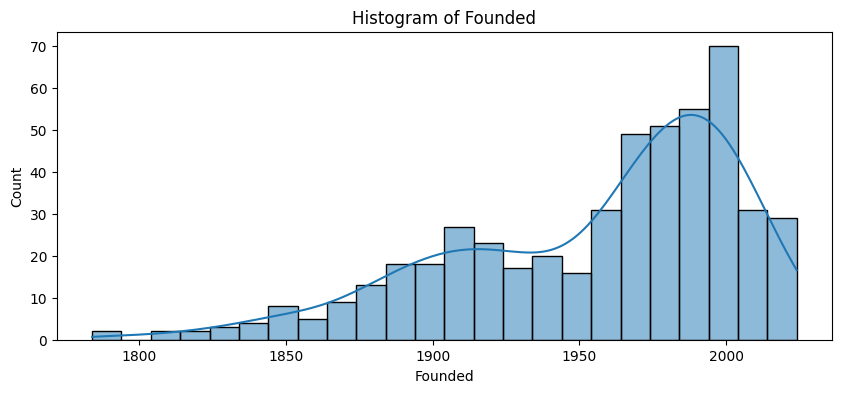

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(eda_df['Founded'], bins=range(int(eda_df['Founded'].min()), int(eda_df['Founded'].max()) + 10, 10), kde=True)
plt.title('Histogram of Founded')
plt.show()


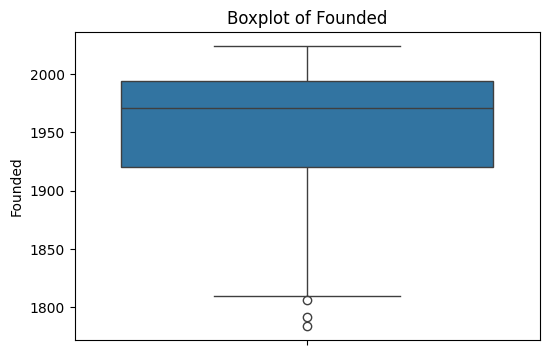

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=eda_df['Founded'])
plt.title('Boxplot of Founded')
plt.show()


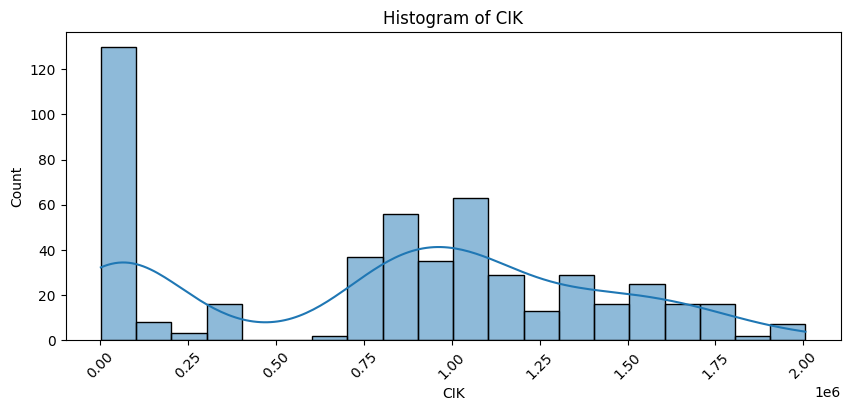

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(eda_df['CIK'], bins=20, kde=True)
plt.xticks(rotation=45)
plt.title('Histogram of CIK')
plt.show()

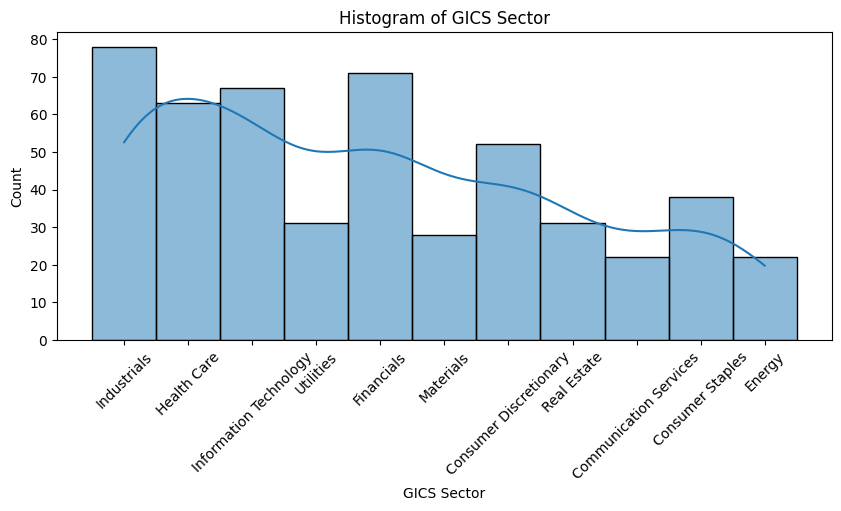

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(eda_df['GICS Sector'], bins=20, kde=True)
plt.xticks(rotation=45)
plt.title('Histogram of GICS Sector')
plt.show()

#Bivariate Analysis

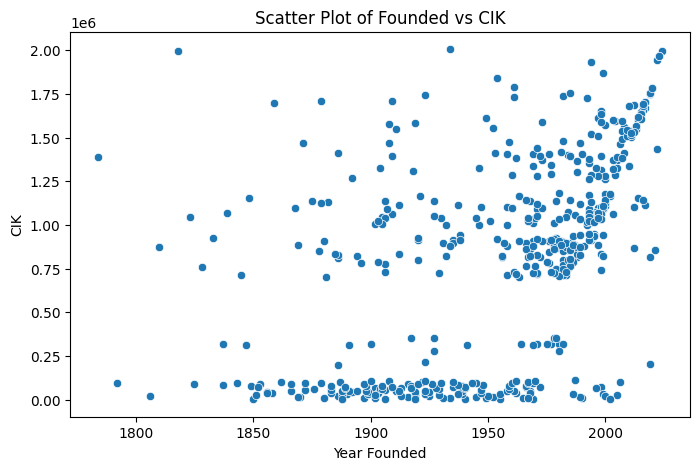

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=eda_df['Founded'], y=eda_df['CIK'])
plt.title('Scatter Plot of Founded vs CIK')
plt.xlabel('Year Founded')
plt.ylabel('CIK')
plt.show()


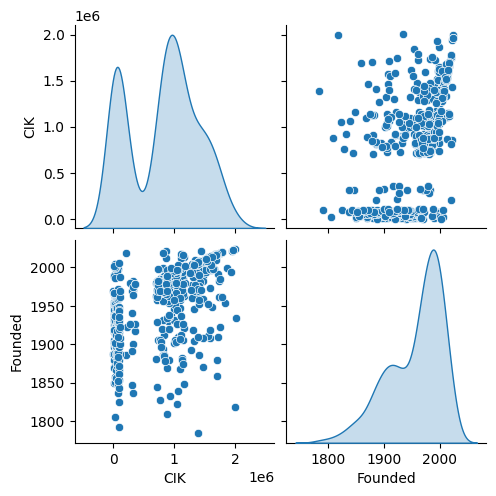

In [ ]:
sns.pairplot(eda_df, diag_kind='kde')
plt.show()


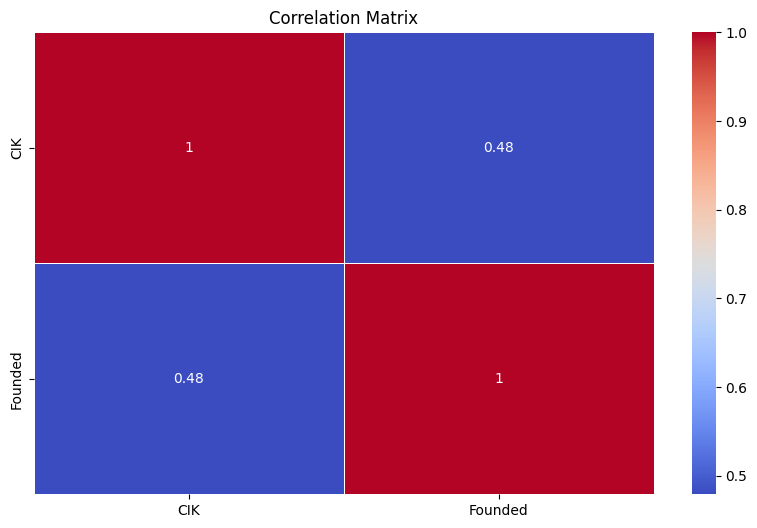

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(eda_df[['CIK', 'Founded']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

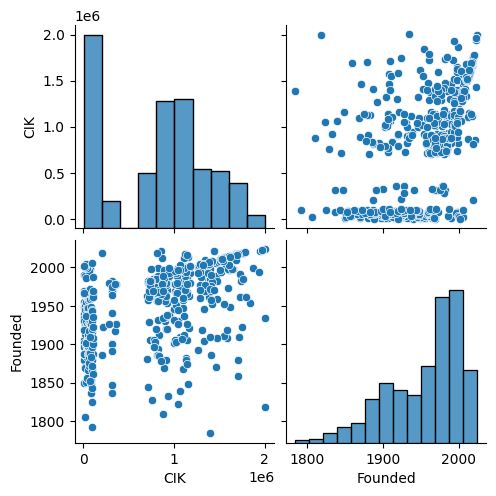

In [ ]:
sns.pairplot(eda_df[['CIK', 'Founded']])
plt.show()


#Categorical Analysis

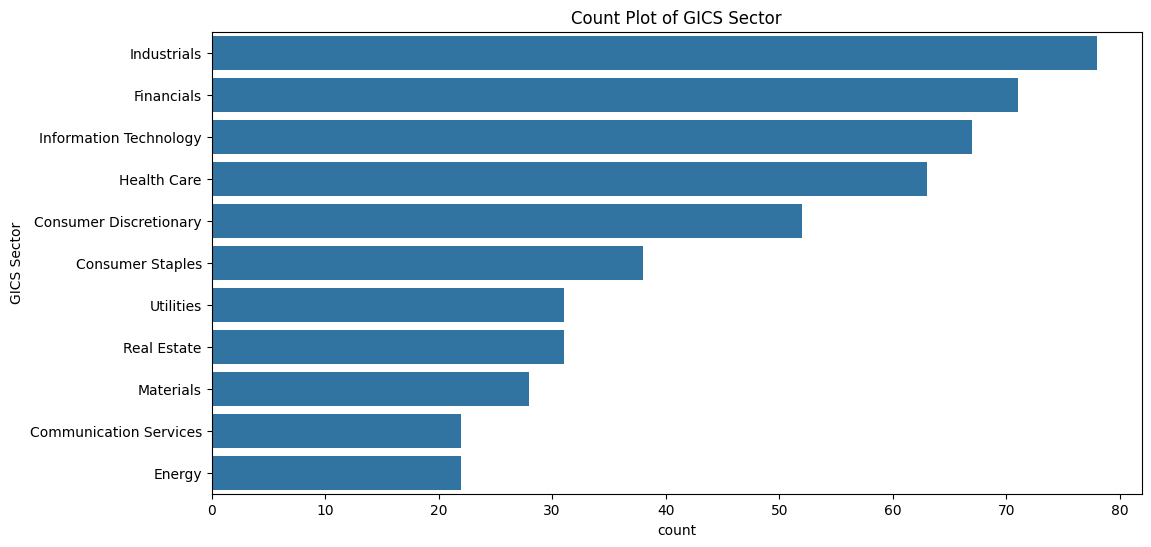

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=eda_df['GICS Sector'], order=eda_df['GICS Sector'].value_counts().index)
plt.title('Count Plot of GICS Sector')
plt.show()


#Discretization and binning

In [ ]:
import pandas as pd

# Define bins for 'Founded' column
bins = [1800, 1900, 1950, 2000, 2025]
bin_labels = ['Very Old (1800-1900)', 'Old (1900-1950)', 'Mid-Age (1950-2000)', 'New (2000-2025)']

# Applying binning
eda_df['Founded_Bins'] = pd.cut(eda_df['Founded'], bins=bins, labels=bin_labels)

# Display binning results
print(eda_df[['Founded', 'Founded_Bins']].head())

# Count the number of companies in each bin
print("\nDistribution of Companies by Founded Year Bins:\n", eda_df['Founded_Bins'].value_counts())


   Founded          Founded_Bins
0   1902.0       Old (1900-1950)
1   1916.0       Old (1900-1950)
2   1888.0  Very Old (1800-1900)
3   2013.0       New (2000-2025)
4   1989.0   Mid-Age (1950-2000)

Distribution of Companies by Founded Year Bins:
 Founded_Bins
Mid-Age (1950-2000)     253
Old (1900-1950)         106
Very Old (1800-1900)     75
New (2000-2025)          67
Name: count, dtype: int64


In [ ]:
# Define bins for 'CIK'
cik_bins = [10000, 50000, 100000, 2000000]
cik_labels = ['Low CIK', 'Medium CIK', 'High CIK']

# Applying binning
eda_df['CIK_Bins'] = pd.cut(eda_df['CIK'], bins=cik_bins, labels=cik_labels)

# Display binning results
print(eda_df[['CIK', 'CIK_Bins']].head())

# Count the number of companies in each bin
print("\nDistribution of Companies by CIK Bins:\n", eda_df['CIK_Bins'].value_counts())


       CIK    CIK_Bins
0    66740  Medium CIK
1    91142  Medium CIK
2     1800         NaN
3  1551152    High CIK
4  1467373    High CIK

Distribution of Companies by CIK Bins:
 CIK_Bins
High CIK      377
Medium CIK     58
Low CIK        50
Name: count, dtype: int64


In [ ]:
# Creating 4 equal-length bins for 'Founded'
eda_df['Founded_Equal_Bins'] = pd.cut(eda_df['Founded'], bins=4)

# Checking the binning results
print("\nEqual-Length Binning for 'Founded':\n", eda_df['Founded_Equal_Bins'].value_counts())



Equal-Length Binning for 'Founded':
 Founded_Equal_Bins
(1964.0, 2024.0]     284
(1904.0, 1964.0]     133
(1844.0, 1904.0]      73
(1783.76, 1844.0]     13
Name: count, dtype: int64


In [ ]:
# Quantile-based binning for 'Founded'
eda_df['Founded_Quantile_Bins'] = pd.qcut(eda_df['Founded'], q=4)

# Checking the binning results
print("\nQuantile-Based Binning for 'Founded':\n", eda_df['Founded_Quantile_Bins'].value_counts())



Quantile-Based Binning for 'Founded':
 Founded_Quantile_Bins
(1920.0, 1971.0]      133
(1783.999, 1920.0]    127
(1971.0, 1994.0]      123
(1994.0, 2024.0]      120
Name: count, dtype: int64


#Outlier detection and filtering

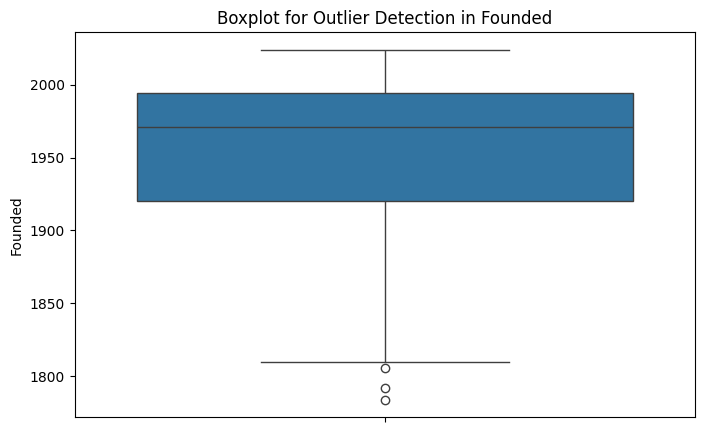

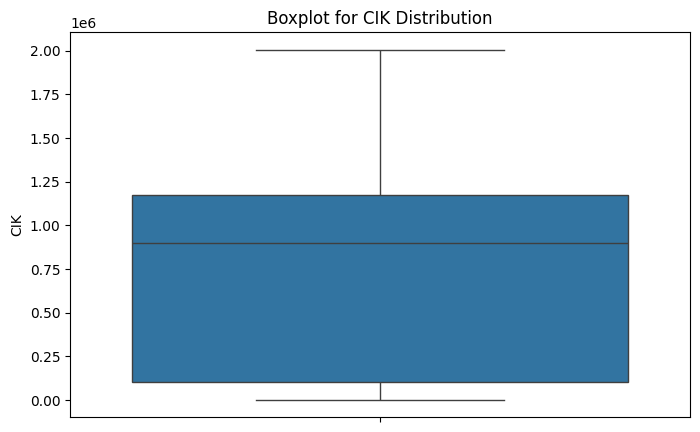

In [ ]:
# Boxplot for 'Founded'
plt.figure(figsize=(8, 5))
sns.boxplot(y=eda_df['Founded'])
plt.title('Boxplot for Outlier Detection in Founded')
plt.show()

# Boxplot for 'CIK' (to check distribution, even though it's an ID)
plt.figure(figsize=(8, 5))
sns.boxplot(y=eda_df['CIK'])
plt.title('Boxplot for CIK Distribution')
plt.show()


In [ ]:
# Outlier Detection using IQR for 'Founded'
Q1 = eda_df['Founded'].quantile(0.25)
Q3 = eda_df['Founded'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers_founded = eda_df[(eda_df['Founded'] < lower_bound) | (eda_df['Founded'] > upper_bound)]
print("Number of Outliers in 'Founded':", len(outliers_founded))

# Displaying outlier rows
print(outliers_founded)


Number of Outliers in 'Founded': 3
    Symbol                  Security       GICS Sector  \
58      BK                BNY Mellon        Financials   
119     CL         Colgate-Palmolive  Consumer Staples   
426    STT  State Street Corporation        Financials   

                    GICS Sub-Industry    Headquarters Location Date added  \
58   Asset Management & Custody Banks  New York City, New York 1995-03-31   
119                Household Products  New York City, New York 1957-03-04   
426  Asset Management & Custody Banks    Boston, Massachusetts 2003-03-14   

         CIK  Founded          Founded_Bins    CIK_Bins Founded_Equal_Bins  \
58   1390777   1784.0                   NaN    High CIK  (1783.76, 1844.0]   
119    21665   1806.0  Very Old (1800-1900)     Low CIK  (1783.76, 1844.0]   
426    93751   1792.0                   NaN  Medium CIK  (1783.76, 1844.0]   

    Founded_Quantile_Bins    TotalPrice  
58     (1783.999, 1920.0]  2.481146e+09  
119    (1783.999, 1920.0] 